In [ ]:
#create the truth table for XOR gate
import numpy as np
x=np.array([[1,1,1,1],[0,0,1,1],[0,1,0,1]]) #x0,x1,x2
y=np.array([0,1,1,0]) #output
print("The Truth Table:",x,y)


The Truth Table: [[1 1 1 1]
 [0 0 1 1]
 [0 1 0 1]] [0 1 1 0]


In [ ]:
#Pick the random weights (w0,w1,w2)
import random
w0=random.uniform(-1, 1)
w1=random.uniform(-1, 1)
w2=random.uniform(-1, 1)
w=np.array([w0,w1,w2])
print(w)

[-0.13253331  0.48924775 -0.32854302]


In [ ]:
w_initial=[w0,w1,w2]

In [ ]:
#calculate the slope 'm' and co-efficient 'c' of y=mx+c
def points(X,W):
  c=-W[0]/W[2]
  m=-W[1]/W[2]
  y=np.multiply(X,m)+c
  return y

In [ ]:
#check the weights and find if it reach the expected output values
def predict(row, weights):
	activation = weights[0]
	for i in range(len(row)-1):
		activation += weights[i + 1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0

In [ ]:
#create the truth table (merging x and y) for XOR
truth_table=np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,0]])
print(truth_table)

[[0 0 0]
 [0 1 1]
 [1 0 1]
 [1 1 0]]


In [ ]:
#Check if initial weight values can predict the output
current_error=0
for row in truth_table:
  prediction=predict(row,w) #w=initial random weights (w0,w1,w2)
  print("Expected=%d, Predicted=%d" % (row[-1], prediction))
  e=row[-1]-prediction
  current_error=e**2+current_error

print(current_error)


  


Expected=0, Predicted=0
Expected=1, Predicted=0
Expected=1, Predicted=1
Expected=0, Predicted=1
2.0


In [ ]:
# Estimate Perceptron weights  calculating epoch independently (for PLA)
def train_weights(train, l_rate, n_epoch,weights):
	#weights = weights
	for epoch in range(n_epoch):
		#error=100
		sum_error = 0
		error=np.zeros(len(train))
		for row in train:
			prediction = predict(row, weights)
			error = row[-1] - prediction
			#print(error)
			sum_error = (error**2)+sum_error
			weights[0] = weights[0] + l_rate * error
			for i in range(len(row)-1):
				weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
		#print('epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
	return weights

In [ ]:
#calculate the weights using PLA using number of epoch=500
l_rate = 0.001
n_epoch = 500
w=[w0,w1,w2] 
print(w)
w_PLA = train_weights(truth_table, l_rate, n_epoch,w)
print(w_PLA)

[-0.13253330716491774, 0.48924774789439573, -0.3285430215524412]
[0.0004666928350823751, 0.15824774789439544, -0.15954302155244104]


In [ ]:
#Check if calculated weight values can predict the output for PLA
for row in truth_table:
  prediction=predict(row,w_PLA) #w=initial random weights (w0,w1,w2)
  print("Expected=%d, Predicted=%d" % (row[-1], prediction))
  #e=row[-1]-prediction
  #print(e)


Expected=0, Predicted=1
Expected=1, Predicted=0
Expected=1, Predicted=1
Expected=0, Predicted=0


In [ ]:
# Estimate Perceptron weights  calculating epoch independently for pocket algorithm
def train_weights_forP(train, l_rate, n_epoch,weights):
	for epoch in range(n_epoch):
		#error=100
		sum_error = 0.0
		error=np.zeros(len(train))
		for row in train:
			prediction = predict(row, weights)
			error = row[-1] - prediction
			#print(error)
			sum_error = (error**2)+sum_error
			weights[0] = weights[0] + l_rate * error
			for i in range(len(row)-1):
				weights[i+1] = weights[i+1] + l_rate * error * row[i]
		#print('epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
	return weights,sum_error

In [ ]:
#Function to calculate weights using pocket algorithm
def train_Pocket(train,l_rate,iter,current_error,weights):
  final= weights   #initialization
  error_t=np.zeros(iter)
  error_t[0]=current_error
  for i in range(iter-1):
      wt,current_error=train_weights_forP(train,l_rate,1,final)
      error_t[i+1]=current_error
      if (error_t[i]>error_t[i+1]):
        final=wt
        #print(final)
      else:
        final=final
  return final,error_t
  

In [ ]:
l_rate = 0.001
n_epoch = 500
w_initial=[w0,w1,w2]
print(w_initial)
w_pocket,error_t = train_Pocket(truth_table, l_rate, n_epoch,current_error,w_initial)
print(w_pocket)
print(error_t)

In [ ]:
#Check if calculated weight values can predict the output for Pocket algorithm
for row in truth_table:
  prediction=predict(row,w_pocket) #w=initial random weights (w0,w1,w2)
  print("Expected=%d, Predicted=%d" % (row[-1], prediction))
  #e=row[-1]-prediction
  #print(e)


Expected=0, Predicted=0
Expected=1, Predicted=0
Expected=1, Predicted=1
Expected=0, Predicted=0


In [ ]:
#w_pocket=[-0.0005333071649176249, 0.15824774789439544, -0.16054302155244105]
#w_PLA=[0.0004666928350823751, 0.15824774789439544, -0.15954302155244104]

In [ ]:
#Plot the values against the actual standard one
#calculate points over X-axis and Y-axis
x10=[0,1]
x20=[0,1]
x11=[0,1]
x21=[1,0]
wt=np.array([-1,.95,.95])
px=np.array([1,0]) #random value for x1, for pocket weights
py1_pocket=points(px[0],w_pocket) #calculate the value for x2,for pocket weights
py2_pocket=points(px[1],w_pocket)
py_pocket=np.array([py1_pocket,py2_pocket])
px=np.array([1,0]) #random value for x1, for PLA weights
py1_pla=points(px[0],w_PLA) #calculate the value for x2,for PLA weights
py2_pla=points(px[1],w_PLA)
py_pla=np.array([py1_pla,py2_pla])
#py1_rand=points(px[0],w_initial) #calculate the value for x2,for random initial weights
#py2_rand=points(px[1],w_initial)
#py_rand=np.array([py1_rand,py2_rand])


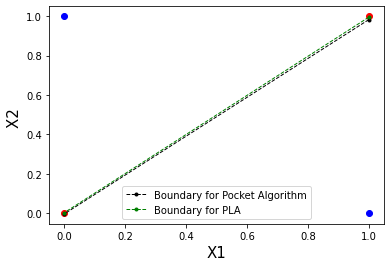

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files
test1 = plt.figure()
plt.plot(x10, x20, 'o', color='red')
plt.plot(x11, x21, 'o', color='blue')
plt.plot(px, py_pocket, linestyle='--',marker='.',color='black',label='Boundary for Pocket Algorithm',linewidth=1)  
plt.plot(px, py_pla,linestyle='--', marker='.',color='green',label='Boundary for PLA',linewidth=1) 
#plt.plot(px, py_rand,linestyle='--', marker='.',color='green',label='Boundary with Random Initial Weights',linewidth=1.2) 
# naming the x axis 
x=plt.xlabel('X1', fontsize='15') 
x.set_color("black")
# naming the y axis 
y=plt.ylabel('X2 ',fontsize='15') 
y.set_color("black")

plt.legend()
#plt.ylim([0,2])